In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import plotly.express as px
import sys

In [2]:
df=pd.read_csv('./data/dataset.csv', sep=',', encoding='utf-8')
df

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
0,1,212600,False,1,77,4WUepByoeqcedHoYhSNHRt,Welcome To New York (Taylor's Version),0.757,0.610,7.0,...,116.998,4WUepByoeqcedHoYhSNHRt,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
1,1,231833,False,2,78,0108kcWLnn2HlH2kedi1gn,Blank Space (Taylor's Version),0.733,0.733,0.0,...,96.057,0108kcWLnn2HlH2kedi1gn,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
2,1,231000,False,3,79,3Vpk1hfMAQme8VJ0SNRSkd,Style (Taylor's Version),0.511,0.822,11.0,...,94.868,3Vpk1hfMAQme8VJ0SNRSkd,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
3,1,235800,False,4,78,1OcSfkeCg9hRC2sFKB4IMJ,Out Of The Woods (Taylor's Version),0.545,0.885,0.0,...,92.021,1OcSfkeCg9hRC2sFKB4IMJ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
4,1,193289,False,5,77,2k0ZEeAqzvYMcx9Qt5aClQ,All You Had To Do Was Stay (Taylor's Version),0.588,0.721,0.0,...,96.997,2k0ZEeAqzvYMcx9Qt5aClQ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1,201106,False,11,70,1j6gmK6u4WNI33lMZ8dC1s,Our Song,0.668,0.672,2.0,...,89.011,1j6gmK6u4WNI33lMZ8dC1s,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
535,1,213053,False,12,60,7CzxXgQXurKZCyHz9ufbo1,I'm Only Me When I'm With You,0.563,0.934,8.0,...,143.964,7CzxXgQXurKZCyHz9ufbo1,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
536,1,203226,False,13,58,1k3PzDNjg38cWqOvL4M9vq,Invisible,0.612,0.394,7.0,...,96.001,1k3PzDNjg38cWqOvL4M9vq,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
537,1,220146,False,14,58,0YgHuReCSPwTXYny7isLja,A Perfectly Good Heart,0.483,0.751,4.0,...,156.092,0YgHuReCSPwTXYny7isLja,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen


# Data Quality Analysis: Taylor Swift Tracks
Antes de proceder a evaluar la calidad de los datos a traves de las seis dimensiones recomendadas por (cite), se desea entrar en contexto de los datos que se poseen actualmente, los datos corresponden a un dataset que representa las canciones de Taylor Swift, sabemos que cada registro o fila representa una canción (track), el dataset posee 27 columnas y 539 registros, las columnas corresponden a las siguientes:

* **disc_number:** The disc number (usually 1 unless the album consists of more than one disc).
* **duration_ms:** The track length in milliseconds.
* **explicit:** Whether or not the track has explicit lyrics ( true = yes it does; false = no it does not OR unknown).
* **track_number:** The number of the track. If an album has several discs, the track number is the number on the specified disc.
* **track_popularity:** The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note: the popularity value may lag actual popularity by a few days: the value is not updated in real time.
* **track_id:** The Spotify ID for the track.
* **track_name:** The name of the track.
* **audio_features.danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* **audio_features.energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* **audio_features.key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. The range is -1 to 11.
* **audio_features.loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db
* **audio_features.mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* **audio_features.speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* **audio_features.acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* **audio_features.instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* **audio_features.liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* **audio_features.valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* **audio_features.tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* **audio_features.id:** 
* **audio_features.time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
* **artist_id:** The Spotify ID for the artist.
* **artist_name:** The name of the artist.
* **artist_popularity:** The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist's popularity is calculated from the popularity of all the artist's tracks.
* **album_id:** The Spotify ID for the album.
* **album_name:** The name of the album. In case of an album takedown, the value may be an empty string.
* **album_release_date:** The date the album was first released.
* **album_total_tracks:** number of tracks in the album.


In [3]:
len(df.columns)

27

In [4]:
len(df)

539

In [5]:
df.size

14553

# Completeness
---
Recordando que la completitud hace referencia a la cantidad de datos que son utilizables o completos. Si hay un alto porcentaje de valores que faltan, puede conducir a un análisis sesgado o engañoso si los datos no son representativos de una muestra de datos típica. (cite IBM) se procede a realizar un análisis de completitud de los datos, en donde se evalue tanto los datos nulos como los datos atipicos en un solo porcentaje.

## Datos Nulos

Se procede a realizar un conteo de datos nulos por columna, para esto se utiliza la función `isnull()` de pandas, la cual retorna un dataframe con valores booleanos, donde `True` indica que el valor es nulo y `False` indica que el valor no es nulo, luego se utiliza la función `sum()` de pandas, la cual retorna la suma de los valores de cada columna, como los valores booleanos son representados como 1 y 0, la suma de los valores de cada columna representa la cantidad de valores nulos por columna.


In [6]:
df[df['track_id'].isnull()]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
321,1,209680,False,8,84,NaN,Gorgeous,0.800,0.535,7.0,...,92.027,1ZY1PqizIl78geGM4xWlEA,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6DEjYFkNZh67HP7R9PSZvv,reputation,2017-11-10,15
363,1,238093,False,35,32,NaN,Jump Then Fall,0.617,NaN,2.0,...,80.007,5zytSTR2g0I9psX2Z12ex6,NaN,06HL4z0CvFAxyc27GX,Taylor Swift,120,1MPAXuTVL2Ej5x0JHiSPq8,NaN,2017-11-09,46
375,1,212600,False,1,60,NaN,Welcome To New York,0.789,0.634,7.0,...,116.992,3nRmDz7qGCvsMS30rGGY0x,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1yGbNOtRIgdIiGHOEBaZWf,1989 (Deluxe),2014-01-01,19
379,1,193293,False,5,60,NaN,All You Had To Do Was Stay,0.605,0.725,5.0,...,96.970,6aLOekfwbytwWvQftxTEF0,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1yGbNOtRIgdIiGHOEBaZWf,1989 (Deluxe),2014-01-01,19
382,1,211933,False,8,61,NaN,Bad Blood,0.646,0.794,7.0,...,170.216,2NlmmAjGYrrjAp0MED5rGx,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1yGbNOtRIgdIiGHOEBaZWf,1989 (Deluxe),2014-01-01,19
434,1,362826,False,6,54,NaN,Back To December/Apologize/You're Not Sorry - ...,0.374,0.516,2.0,...,142.057,1IsquhJFJ0qcFZI7FeAEuN,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16
442,1,389213,False,14,49,NaN,Enchanted - Live/2011,0.340,0.663,8.0,...,163.678,3lm4L3pPL32PFy74dR17OR,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16
445,1,230546,False,1,49,NaN,Mine - POP Mix,0.696,0.768,7.0,...,121.050,0GxW5K0qzrq7L1jwSY5OmY,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6Ar2o9KCqcyYF9J0aQP3au,Speak Now,2010-10-25,14


In [7]:
nulls=df.isnull().sum().to_frame().rename(columns={0:'Nulls'})
nulls

,Nulls
disc_number,0
duration_ms,0
explicit,0
track_number,0
track_popularity,0
track_id,8
track_name,7
audio_features.danceability,2
audio_features.energy,2
audio_features.key,1


Esta misma información se puede visualizar en un grafico de barras donde se muestra la cantidad de valores no nulos para cada columna, como se logra concluir de manera más sencilla en el gráfico la columna que contiene mayor cantidad de valores nulos es **albums.album_name** además se puede ver el porcentaje de completitud no exacto a la izquierda del grafico como se ve todas las columnas estan por encima del 0.8 esto es el 80% de completitud, por ahora este porcentaje solo nos da una pequeña nocion de la completitud de los datos pues se puede contar el numero de datos nulos y calcular un porcentaje con absoluta precisión.

<Axes: >

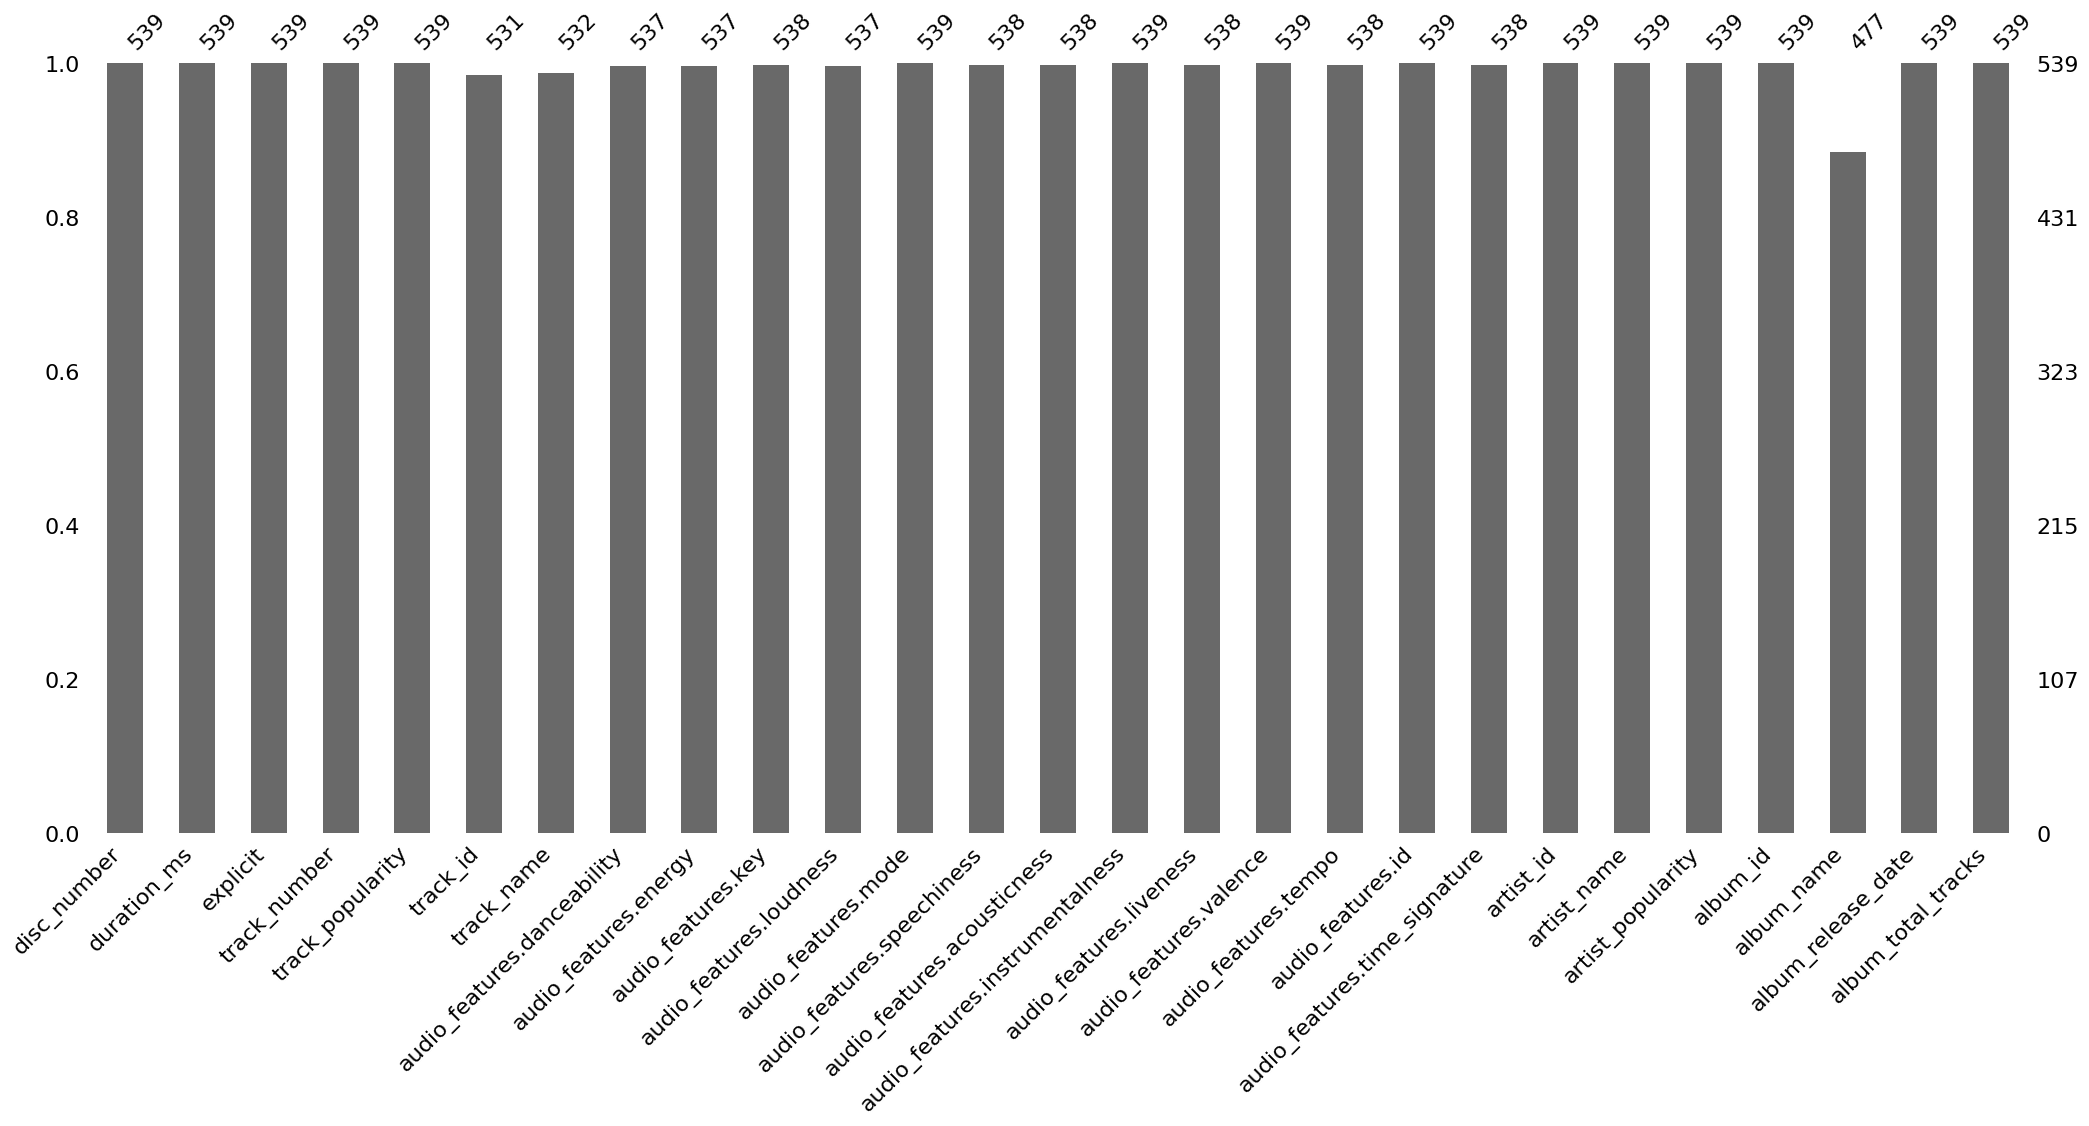

In [8]:
msno.bar(df)

Como se visualiza en la tabla de las 27 columnas 12 de ellas poseen valores nulos, para visualizar mejor los valores nulos del dataset se procede a realizar una missigness plot donde se muestra para cada columna los valores nulos y donde se encuentran ubicados dentro del dataset.

<Axes: >

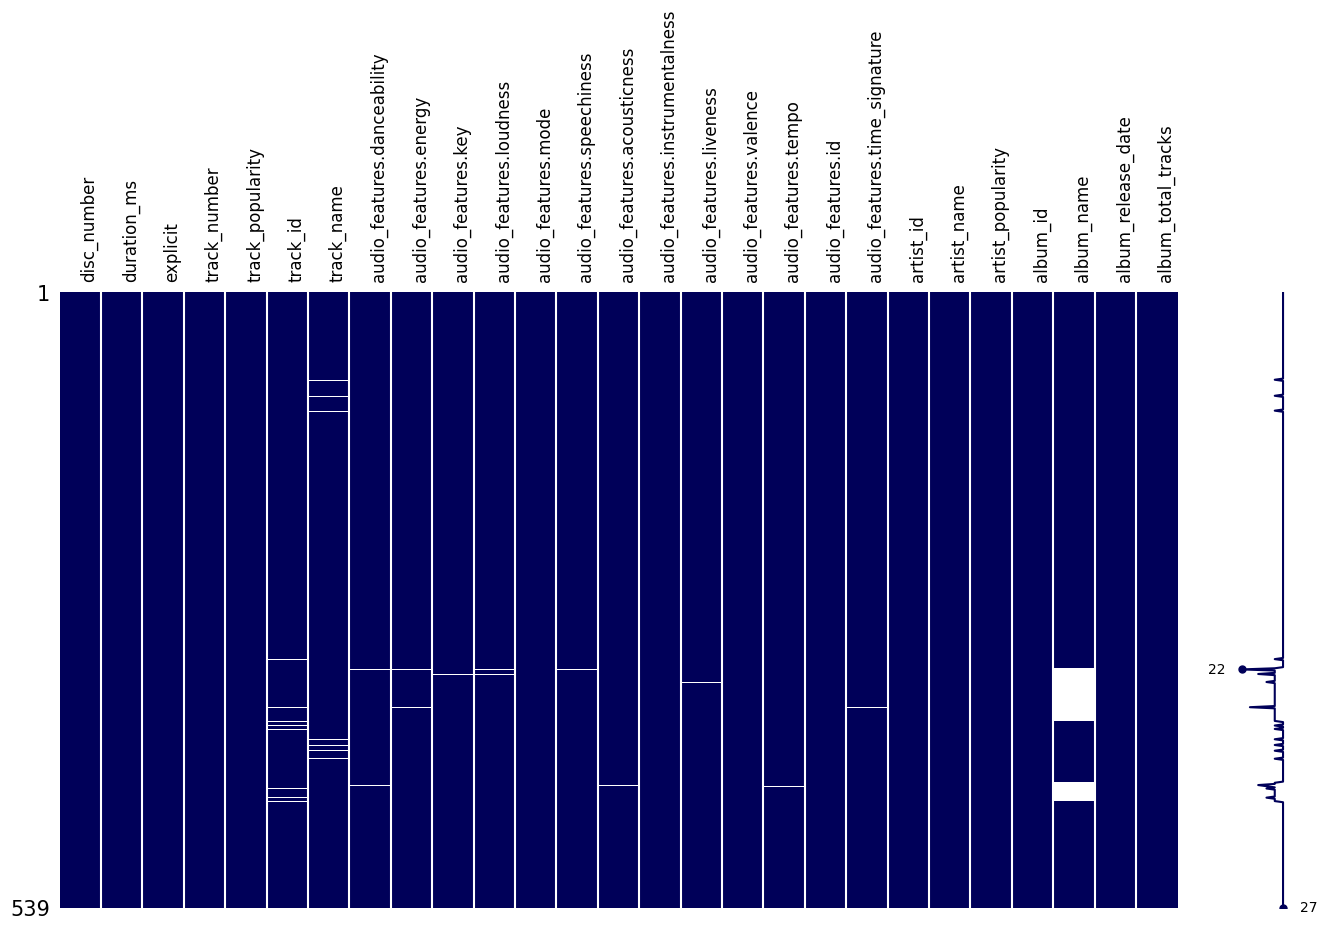

In [9]:
msno.matrix(df, color=(0, 0, 0.34901960784313724), fontsize=12, figsize=(16, 8), label_rotation=90)

Ahora para calcular un porcentaje de completitud más exacto se procede a realizar un conteo de los valores nulos por columna y luego se divide por el total de registros del dataset, la propiedad size retorna el número de registros que debe tener un dataframe, esto es numero de filas por numero de columnas, luego se multiplica por 100 para obtener el porcentaje de completitud, como se ve el porcentaje de valores no nulos es de $99.39\%$ redondeando a dos cifras significativas, esto quiere decir que el dataset posee apenas un $0.61\%$ de valores nulos, lo cual es un porcentaje muy bajo, podemos concluir parcialmente que contando solo los valores nulos el dataset posee una alta completitud, pero no podemos concluir que el dataset posee una alta completitud en general, pues no hemos contado los valores atipicos.

In [10]:
non_nulls_percentage=(1-nulls['Nulls'].sum()/df.size)*100
print('Non nulls percentage: {:.2f}%'.format(non_nulls_percentage))
nulls

Non nulls percentage: 99.39%


,Nulls
disc_number,0
duration_ms,0
explicit,0
track_number,0
track_popularity,0
track_id,8
track_name,7
audio_features.danceability,2
audio_features.energy,2
audio_features.key,1


De igual manera se puede revisar el porcentaje de completitud de cada columna, para esto utilizamos el dataframe almacenado de **nulls** agregando las columnas non_nulls, non_nulls_percentage, nulls_percentage, Total y Total_percentage de esta manera se resume y evidencia como se encuentran los valores nulos en el dataset por columna.

In [11]:
nulls=df.isnull().sum().to_frame().rename(columns={0:'Nulls'})
nulls['Nulls%']=nulls['Nulls']/len(df)*100
nulls['Non-Nulls']=df.notnull().sum()
nulls['Non-Nulls%']=nulls['Non-Nulls']/len(df)*100
nulls=nulls.sort_values(by='Non-Nulls', ascending=False)
nulls

,Nulls,Nulls%,Non-Nulls,Non-Nulls%
disc_number,0,0.000000,539,100.000000
audio_features.mode,0,0.000000,539,100.000000
album_release_date,0,0.000000,539,100.000000
album_id,0,0.000000,539,100.000000
artist_popularity,0,0.000000,539,100.000000
artist_name,0,0.000000,539,100.000000
artist_id,0,0.000000,539,100.000000
audio_features.id,0,0.000000,539,100.000000
audio_features.valence,0,0.000000,539,100.000000
audio_features.instrumentalness,0,0.000000,539,100.000000


In [12]:
nulls=nulls.reset_index().rename(columns={'index':'Column'})

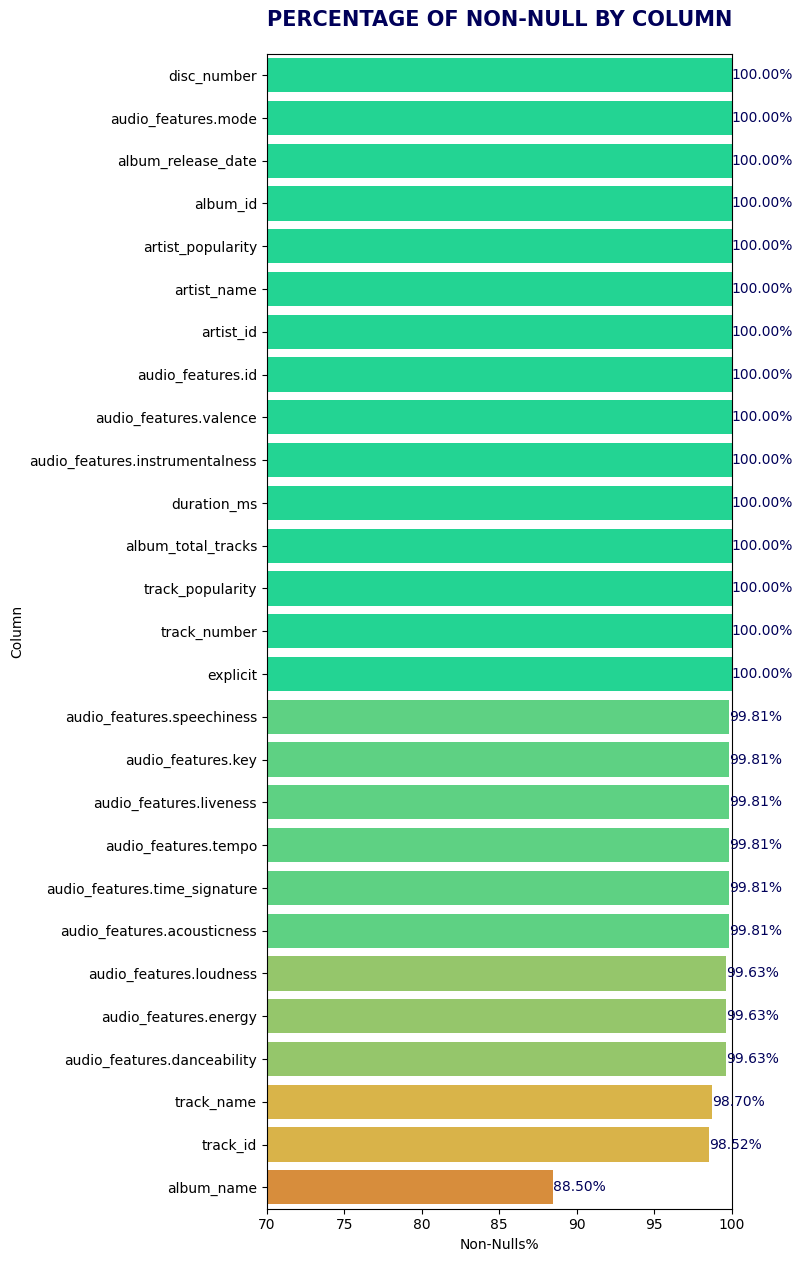

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('rg', ["#F23005", "#f1c232", "#05f29b"], N=256)

max = nulls['Non-Nulls%'].max()
min = nulls['Non-Nulls%'].min() - 20
mean = nulls['Non-Nulls%'].mean()
norm = TwoSlopeNorm(vmin=min, vcenter=mean, vmax=max)

colors = [cmap(norm(c)) for c in nulls['Non-Nulls%']]

f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(y="Column", x="Non-Nulls%", data=nulls, palette=colors, hue='Column')

ax.set_xlim(70, 100)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', fontsize=10, color='#000059')

plt.title('PERCENTAGE OF NON-NULL BY COLUMN', fontsize=15, fontweight='bold', pad=20, color='#000059')
plt.savefig('./img/percentage_non_null_by_column.png', bbox_inches='tight')
plt.show()  # Ensure that this line is at the same indentation level as ax.bar_label


Otro porcentaje que resulta interesante en cuanto a valores nulos es el número de registros o filas que no contienen ningun valor nulo, a continuación se muestra como con un filtro sencillo en pandas se puede obtener los registros que contienen al menos un valor nulo, esto es importante pues un criterio de selección de registros validos puede ser que no tenga ningún registro nulo o contenga como un máximo de campos nulos.

In [14]:
df[df.isnull().any(axis=1)]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
77,1,191039,False,13,68,1QQii3pa5m8MEda0nbkjfw,NaN,0.661,0.345,4.0,...,125.977,1QQii3pa5m8MEda0nbkjfw,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),2027-05-26,24
91,1,200690,False,3,71,02Zkkf2zMkwRGQjZ7T4p8f,NaN,0.638,0.634,4.0,...,96.953,02Zkkf2zMkwRGQjZ7T4p8f,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,3lS1y25WAhcqJDATJK70Mq,Midnights (3am Edition),2022-10-22,20
104,1,196258,False,16,72,7712gjoih4QoDbXpljEk21,NaN,0.700,0.509,7.0,...,110.947,7712gjoih4QoDbXpljEk21,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,3lS1y25WAhcqJDATJK70Mq,Midnights (3am Edition),2022-10-22,20
321,1,209680,False,8,84,NaN,Gorgeous,0.800,0.535,7.0,...,92.027,1ZY1PqizIl78geGM4xWlEA,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6DEjYFkNZh67HP7R9PSZvv,reputation,2017-11-10,15
329,1,329160,False,1,42,00vJzaoxM3Eja1doBUhX0P,All Too Well,0.602,0.605,0.0,...,93.061,00vJzaoxM3Eja1doBUhX0P,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1MPAXuTVL2Ej5x0JHiSPq8,NaN,2017-11-09,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,1,404680,False,13,48,4DbI1rr4IQ2bc8nejy9ttd,Dear John - Live/2011,0.521,0.386,4.0,...,119.518,4DbI1rr4IQ2bc8nejy9ttd,3.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16
442,1,389213,False,14,49,NaN,Enchanted - Live/2011,0.340,0.663,8.0,...,163.678,3lm4L3pPL32PFy74dR17OR,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16
443,1,292426,False,15,48,6znB7YZhMJT2B83zfbiyLq,Haunted - Live/2011,0.338,0.818,5.0,...,162.157,6znB7YZhMJT2B83zfbiyLq,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16
444,1,376466,False,16,48,5QkzyLUb4ggojNDp8G2OxX,Long Live - Live/2011,0.544,0.728,7.0,...,101.939,5QkzyLUb4ggojNDp8G2OxX,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16


El porcentaje de registros sin valores nulos se calcula haciendo uso del filtro anterior, como vemos este es $86..27\%$, el cual representa que de todos nuestros registros el $86.27\%$ no posee ningún valor nulo

In [15]:
non_nulls_rows=((len(df)-len(df[df.isnull().any(axis=1)]))/len(df))*100
print('Non nulls rows percentage: {:.2f}%'.format(non_nulls_rows))
539-74


Non nulls rows percentage: 86.27%


465

### Inconsistencias en la representación de valores nulos

Por último se procede a revisar si existen posibles valores nulos pero que no son detectados por la función `isnull()` de pandas, estos posibles valores son cadenas de texto que se guardan con "Null", "null", "None", "none", "NaN", "nan", "Nan", "nAn", "naN", "nAN", "NAN", "n/a", "N/a", "N/A", "n/A", "na", "Na", "nA", "NA", "n.a", "N.a", "n.A", "N.A", "n.a.". Como se visualiza no existen columnas que contengan valores nulos que estan en formato string.

In [17]:
# Verify if there are rows with some possible null values that are not nulls
null_values=["Null", "null", "None", "none", "NaN", "nan", "Nan", "nAn", "naN", "nAN", "NAN", "n/a", "N/a", "N/A", "n/A", "na", "Na", "nA", "NA", "n.a", "N.a", "n.A", "N.A", "n.a."]
for column in df.columns:
    if df[column].isin(null_values).any():
        print('Column {} has null values'.format(column))

In [20]:
nulls['Non-Nulls'].sum()

14464

In [19]:
non_nulls_percentage=(1-nulls['Nulls'].sum()/df.size)*100
print('Non nulls percentage: {:.2f}%'.format(non_nulls_percentage))

Non nulls percentage: 99.39%
